In [4]:
import pandas as pd
from datetime import datetime
import numpy as np

In [2]:
# Load data
datapath = "data/"
df = pd.read_csv(f"{datapath}/story_list.csv")
df

,Item,Time,Published_time,Actor(s),Event,Shares,Comments,Reactions
0,1,Late 2020,19-Sep-22,Trump,Took away WH documents,1891,1056,5757
1,2,21-Jan,26-Aug-22,Trump,Resist Returning the documents,1770,2535,2604
2,3,21-May,24-Aug-22,National Archives,Request Trump to return documents,329,29,96
3,4,22-Feb,7-Feb-22,Trump,Return some documents,1134,1723,4514
4,5,22-Feb,9-Feb-22,National Archives,Found classified documents,4479,4471,12426
5,6,22-Feb,11-Feb-22,Trump,Faced possible legal consequences,2854,1682,1957
6,7,22-Feb,25-Feb-22,House panel,Widened investigation,577,322,2909
7,8,22-Aug,8-Aug-22,FBI,Searched Trump’s Home,7128,7406,11177
8,9,22-Aug,12-Aug-22,Far right people,"Talks of war, and conspiracy",758,664,3107
9,10,22-Aug,10-Aug-22,Trump,Suggests FBI planted evidence,100,256,342


In [5]:
# First, ensure that the 'Published_time' is in datetime format
df['Published_time'] = pd.to_datetime(df['Published_time'], format='%d-%b-%y')

# Find the earliest date, which will be our reference point
reference_date = df['Published_time'].min()

# Calculate the difference in days from the reference date
df['Release_daily'] = (df['Published_time'] - reference_date).dt.days

# Calculate the difference in weeks from the reference date
# The difference in days is divided by 7 and then we use np.floor to get the full weeks.
# astype(int) is used to convert the result into an integer
df['Release_weekly'] = np.floor((df['Published_time'] - reference_date).dt.days / 7).astype(int)

df

,Item,Time,Published_time,Actor(s),Event,Shares,Comments,Reactions,Release_daily,Release_weekly
0,1,Late 2020,2022-09-19,Trump,Took away WH documents,1891,1056,5757,224,32
1,2,21-Jan,2022-08-26,Trump,Resist Returning the documents,1770,2535,2604,200,28
2,3,21-May,2022-08-24,National Archives,Request Trump to return documents,329,29,96,198,28
3,4,22-Feb,2022-02-07,Trump,Return some documents,1134,1723,4514,0,0
4,5,22-Feb,2022-02-09,National Archives,Found classified documents,4479,4471,12426,2,0
5,6,22-Feb,2022-02-11,Trump,Faced possible legal consequences,2854,1682,1957,4,0
6,7,22-Feb,2022-02-25,House panel,Widened investigation,577,322,2909,18,2
7,8,22-Aug,2022-08-08,FBI,Searched Trump’s Home,7128,7406,11177,182,26
8,9,22-Aug,2022-08-12,Far right people,"Talks of war, and conspiracy",758,664,3107,186,26
9,10,22-Aug,2022-08-10,Trump,Suggests FBI planted evidence,100,256,342,184,26


In [9]:
# Get list of a release time (daily)
data_list = df[['Item', 'Release_daily']].values.tolist()
print(data_list)

[[1, 224], [2, 200], [3, 198], [4, 0], [5, 2], [6, 4], [7, 18], [8, 182], [9, 186], [10, 184], [11, 183], [12, 197], [13, 200], [14, 189], [15, 185], [16, 200], [17, 201], [18, 236], [19, 243], [20, 303]]


In [10]:
# Get list of a release time (weekly)
data_list = df[['Item', 'Release_weekly']].values.tolist()
print(data_list)

[[1, 32], [2, 28], [3, 28], [4, 0], [5, 0], [6, 0], [7, 2], [8, 26], [9, 26], [10, 26], [11, 26], [12, 28], [13, 28], [14, 27], [15, 26], [16, 28], [17, 28], [18, 33], [19, 34], [20, 43]]


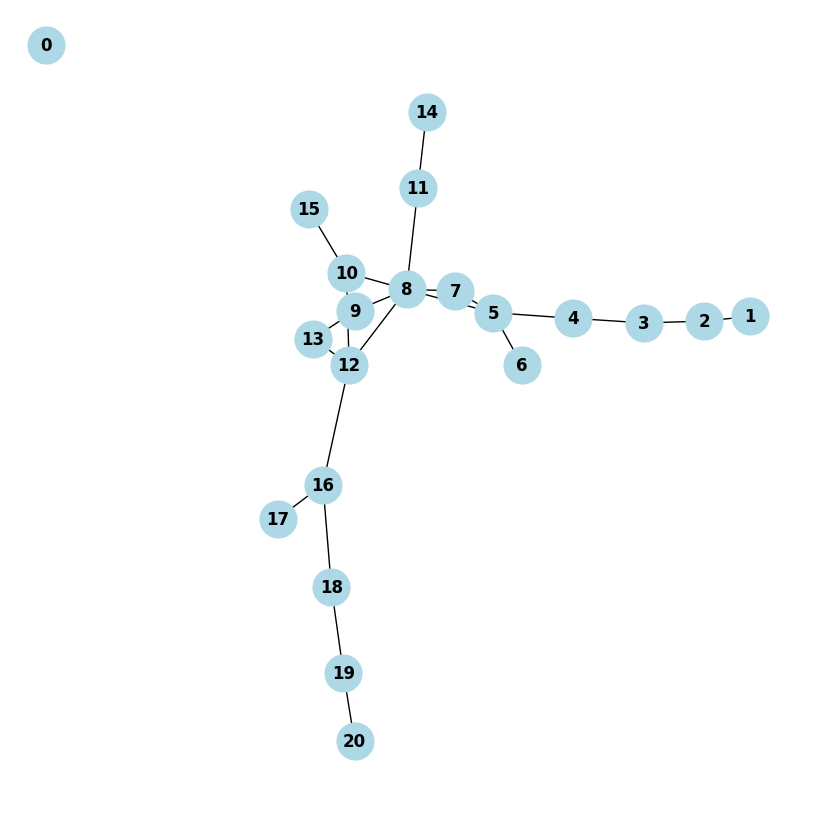

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

def create_custom_graph():
    # Create an empty graph
    G = nx.Graph()
    
    # Add 20 nodes. Assuming nodes are labeled from 0 to 21 (story 0 as dummy)
    G.add_nodes_from(range(21))
    
    # Manually add edges. Each tuple represents a link between two nodes.
    edges = [(1,2), (2,3), (3,4), (4,5), (5,6), (5, 7), (5, 8),
             (7,8), (8,9), (8,10), (8,11), (8,12), (9,13), (10,12), (10,15),
             (11,14), (12,13), (12, 16), (16,17), (16,18), (18,19), (19,20)]
    
    # Add edges to the graph
    G.add_edges_from(edges)
    
    return G

# Create the graph
G = create_custom_graph()

# Draw the graph
plt.figure(figsize=(8, 8))
nx.draw(G, with_labels=True, node_size=700, node_color="lightblue", font_weight="bold")
plt.show()


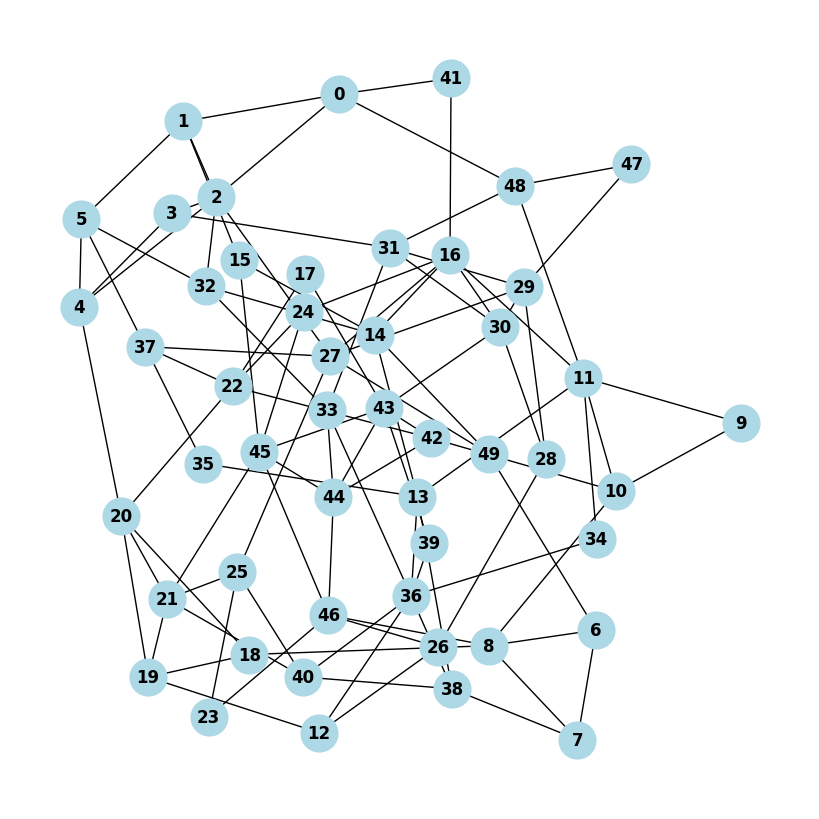

In [13]:
def small_world_graph(n):
    G = nx.watts_strogatz_graph(n=n, k=4, p=0.5)
    return G

# Create the graph
social_G = small_world_graph(50)

# Draw the graph
plt.figure(figsize=(8, 8))
nx.draw(social_G, with_labels=True, node_size=700, node_color="lightblue", font_weight="bold")
plt.show()